In [1]:
import pandas as pd
import numpy as np
import json
from tuner_trial_functions import *

In [2]:
trials_np = np.zeros(0)
base_dir = 'tuners/tuner1'
num_trials = get_num_trials(base_dir)
trials_np = create_trials_np(num_trials, base_dir)


tuner_df = create_tuner_df(num_trials, trials_np)
df = best_trials(tuner_df, num_trials=num_trials)

In [3]:
df.head(-1)

,num_layers,d_model,dff,num_heads,dropout_rate,warmup_steps,batch_size,beta_1,beta_2,epsilon,activation,sequential,val_accuracy
1,2,80,1088,14,0.250,7000,112,0.8700,0.990,6.804129e-09,relu,False,0.359152
6,3,48,576,13,0.250,5500,96,0.8750,0.970,5.939217e-08,swish,False,0.394652
4,1,160,1024,8,0.250,6000,112,0.8025,0.960,5.334915e-09,relu,False,0.399723
3,3,16,896,8,0.150,2000,48,0.8325,0.975,1.225897e-09,relu,True,0.414938
7,4,160,896,12,0.225,6500,80,0.8650,0.965,2.381387e-09,relu,True,0.425081
0,1,112,1216,13,0.175,4000,96,0.8975,0.975,1.235820e-09,relu,True,0.430152
9,2,176,1280,13,0.200,2000,80,0.8750,0.970,1.981211e-08,swish,True,0.431074
2,3,16,1024,11,0.125,3000,32,0.7800,0.960,1.473318e-09,relu,False,0.443522
5,3,112,960,13,0.200,6000,96,0.7500,0.965,2.517103e-07,swish,False,0.444444


In [4]:
df.to_csv("tuner3.csv")

In [42]:
tuner1 = pd.read_csv("tuner1.csv")
tuner2 = pd.read_csv("tuner2.csv")
tuner3 = pd.read_csv("tuner3.csv")

In [96]:
df = pd.concat([tuner1, tuner2, tuner3])
#df.insert(0, 'new_column', np.zeros(177))
#df = pd.concat([df, pd.Series()], axis=1)

df.reset_index(drop=True, inplace=True)
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df = df.sort_values(by=['val_accuracy'])

In [97]:
df.head(-1)

,num_layers,d_model,dff,num_heads,dropout_rate,warmup_steps,batch_size,beta_1,beta_2,epsilon,activation,sequential,val_accuracy
167,2,80,1088,14,0.25,7000,112,0.8700,0.990,6.804129e-09,relu,False,0.359152
168,3,48,576,13,0.25,5500,96,0.8750,0.970,5.939217e-08,swish,False,0.394652
169,1,160,1024,8,0.25,6000,112,0.8025,0.960,5.334915e-09,relu,False,0.399723
0,8,320,1536,10,0.10,2500,64,0.9000,0.980,1.000000e-09,relu,True,0.407100
170,3,16,896,8,0.15,2000,48,0.8325,0.975,1.225897e-09,relu,True,0.414938
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2,56,896,13,0.22,2500,64,0.7900,0.975,5.443117e-08,relu,True,0.507146
163,2,88,736,10,0.04,3000,64,0.8100,0.990,4.219452e-08,relu,True,0.508068
162,2,32,1024,9,0.22,3750,64,0.8100,0.980,3.370615e-08,relu,True,0.508068
164,2,88,896,14,0.20,2500,64,0.7900,0.975,6.224755e-08,relu,True,0.508529


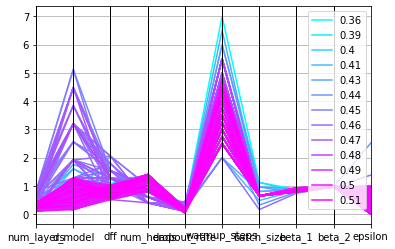

<Figure size 160x320 with 0 Axes>

In [100]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

data = df.sort_values(by=['val_accuracy']).copy()
data.drop(columns=['activation','sequential'], axis=1, inplace=True)
data['val_accuracy'] = data['val_accuracy'].round(2)
data['warmup_steps'] = data['warmup_steps'].div(1000)
data['dff'] = data['dff'].div(1000)
data['d_model'] = data['d_model'].div(100)
data['batch_size'] = data['batch_size'].div(100)
data['num_heads'] = data['num_heads'].div(10)
data['num_layers'] = data['num_layers'].div(10)
data['epsilon'] = data['epsilon'].mul(10000000)



# Make the plot
parallel_coordinates(data, 'val_accuracy', colormap=plt.get_cmap("cool"))
plt.figure(figsize=(2, 4), dpi=80)
plt.show()